In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q pandas pyarrow
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 45.3 MB/s eta 0:00:00


In [ ]:
# Data Folder Directry
main_dir = '/content/drive/MyDrive/Colab Notebooks/Data/asl-signs/'

In [ ]:
import pandas as pd
import os

metadata_sub_dir = 'train.csv'
metadata_full_file_path = os.path.join(main_dir, metadata_sub_dir)
df_metadata = pd.read_csv(metadata_full_file_path)
# Read the .parquet file
#df = pd.read_parquet(file_path)
df_metadata

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [ ]:
N_SAMPLES = len(df_metadata)

In [ ]:
import json

signmap_sub_dir = 'sign_to_prediction_index_map.json'
signmap_full_file_path = os.path.join(main_dir, signmap_sub_dir)

# Load the sign to index mapping
with open(signmap_full_file_path, 'r') as file:
    sign_to_index = json.load(file)

# Map the labels in the dataframe
df_metadata['sign_index'] = df_metadata['sign'].map(sign_to_index)

In [ ]:
df_metadata

,path,participant_id,sequence_id,sign,sign_index
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164
...,...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white,238
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have,108
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower,86
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room,188


In [ ]:
samplefile_dir = df_metadata['path'][0]
samplefile_full_file_path = os.path.join(main_dir, samplefile_dir)
print(samplefile_full_file_path)

# Read the .parquet file
df_samplefile = pd.read_parquet(samplefile_full_file_path)
df_samplefile

/content/drive/MyDrive/Colab Notebooks/Data/asl-signs/train_landmark_files/26734/1000035562.parquet


,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
12484,42,42-right_hand-16,right_hand,16,0.001660,0.549574,-0.145409
12485,42,42-right_hand-17,right_hand,17,0.042694,0.693116,-0.085307
12486,42,42-right_hand-18,right_hand,18,0.006723,0.665044,-0.114017
12487,42,42-right_hand-19,right_hand,19,-0.014755,0.643799,-0.123488


In [ ]:
df_samplefile['type'].unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [ ]:
df_samplefile['frame'].unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42], dtype=int16)

In [ ]:
df_singleframe = df_samplefile[df_samplefile['frame']==20]
df_singleframe

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
538,20,20-right_hand-16,right_hand,16,0.422241,0.390434,-0.049388
539,20,20-right_hand-17,right_hand,17,0.282980,0.457257,-0.038326
540,20,20-right_hand-18,right_hand,18,0.313736,0.412344,-0.052699
541,20,20-right_hand-19,right_hand,19,0.350728,0.399582,-0.060217


In [ ]:
df_singleframe['type'][522]

'right_hand'

In [ ]:
df_singleframe[df_singleframe['type']=='left_hand']

,frame,row_id,type,landmark_index,x,y,z
468,20,20-left_hand-0,left_hand,0,NaN,NaN,NaN
469,20,20-left_hand-1,left_hand,1,NaN,NaN,NaN
470,20,20-left_hand-2,left_hand,2,NaN,NaN,NaN
471,20,20-left_hand-3,left_hand,3,NaN,NaN,NaN
472,20,20-left_hand-4,left_hand,4,NaN,NaN,NaN
473,20,20-left_hand-5,left_hand,5,NaN,NaN,NaN
474,20,20-left_hand-6,left_hand,6,NaN,NaN,NaN
475,20,20-left_hand-7,left_hand,7,NaN,NaN,NaN
476,20,20-left_hand-8,left_hand,8,NaN,NaN,NaN
477,20,20-left_hand-9,left_hand,9,NaN,NaN,NaN


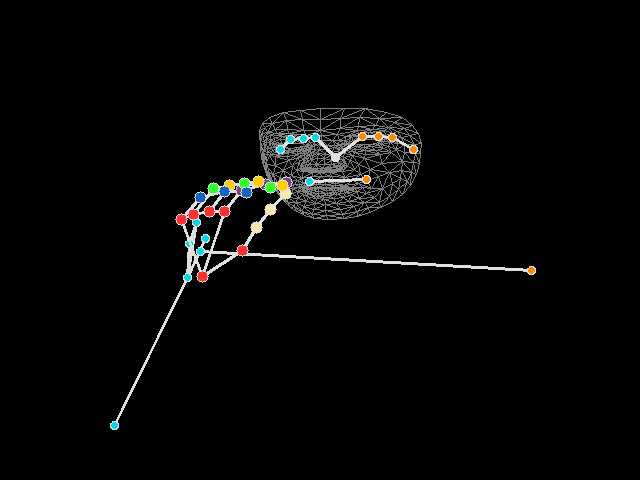

In [ ]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from mediapipe.framework.formats import landmark_pb2

# Initialize MediaPipe solutions
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands  # Add this line for hand landmarks

# Load the landmark data (replace this with your actual file path)
df_landmark = df_samplefile

# Create a black image
image_height, image_width = 480, 640
image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# Function to draw landmarks using MediaPipe's utility
def draw_mediapipe_landmarks(image, df, landmark_type):
    # Convert DataFrame to MediaPipe Landmark list
    landmarks = []
    for _, row in df.iterrows():
        if pd.isna(row['x']) or pd.isna(row['y']):
            continue
        landmark = landmark_pb2.NormalizedLandmark(
            x=row['x'], y=row['y'], z=row.get('z', 0))
        landmarks.append(landmark)

    landmark_list = landmark_pb2.NormalizedLandmarkList(
        landmark=landmarks)

    # Draw landmarks
    if landmark_type == 'face':
        mp_drawing.draw_landmarks(
            image, landmark_list,
            mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
    elif landmark_type == 'pose':
        mp_drawing.draw_landmarks(
            image, landmark_list,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    elif landmark_type == 'right_hand':
        mp_drawing.draw_landmarks(
            image, landmark_list,
            mp_hands.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())
    elif landmark_type == 'left_hand':
        mp_drawing.draw_landmarks(
            image, landmark_list,
            mp_hands.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())

# Draw landmarks for a specific frame and type
frame_number = 20  # Example frame number
df_frame = df_landmark[df_landmark['frame'] == frame_number]

# Example: Drawing face landmarks
draw_mediapipe_landmarks(image, df_frame[df_frame['type'] == 'face'], 'face')

# Example: Drawing pose landmarks
draw_mediapipe_landmarks(image, df_frame[df_frame['type'] == 'pose'], 'pose')

# Example: Drawing left hand landmarks
#draw_mediapipe_landmarks(image, df_frame[df_frame['type'] == 'left_hand'], 'left_hand')

# Example: Drawing right hand landmarks
draw_mediapipe_landmarks(image, df_frame[df_frame['type'] == 'right_hand'], 'right_hand')
#draw_mediapipe_landmarks(image, df_frame[df_frame['type'] == 'left_hand'], 'left_hand')
# Display the image
cv2_imshow(image)


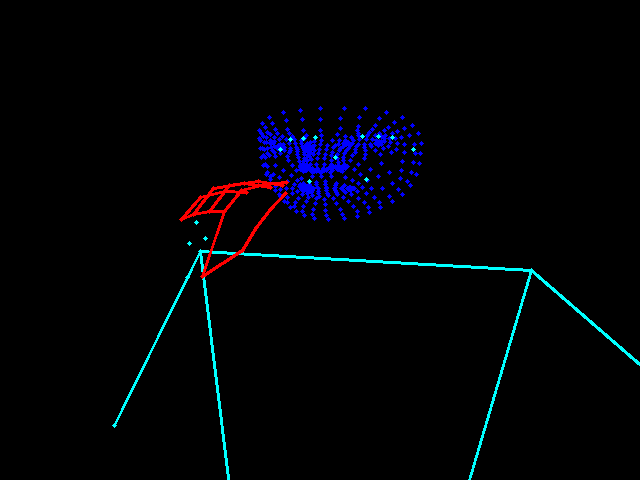

In [ ]:
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

# Load the landmark data
df_landmark = df_samplefile

# Create a black image
image_height, image_width = 480, 640
image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# Define connections for face, pose, and hands
# Define the face connections here
#"""
FACE_CONNECTIONS = [
    # Face oval
    #*(list(zip(range(0, 151), range(1, 152))) + [(151, 0)]),

    # Eyebrows
    #*list(zip(range(152, 157), range(153, 158))), # Right eyebrow
    #*list(zip(range(158, 163), range(159, 164))), # Left eyebrow

    # Eyes
    #*list(zip(range(133, 141), range(134, 142))) + [(141, 133)], # Right eye
    #*list(zip(range(362, 370), range(363, 371))) + [(370, 362)], # Left eye

    # Lips (outer and inner)
    #*list(zip(range(61, 67), range(62, 68))) + [(67, 61)], # Outer top lip
    #*list(zip(range(146, 152), range(147, 153))) + [(152, 146)], # Outer bottom lip
    #*list(zip(range(78, 82), range(79, 83))) + [(82, 78)], # Inner top lip
    #*list(zip(range(87, 91), range(88, 92))) + [(91, 87)], # Inner bottom lip

    # Nose
    #*list(zip(range(234, 238), range(235, 239))), # Nose bridge
    #*list(zip(range(308, 314), range(309, 315)))  # Lower nose
]
#"""
#FACE_CONNECTIONS = []
# Define the pose connections here
POSE_CONNECTIONS = [
    # Torso
    (11, 12), (11, 23), (12, 24), (23, 24),

    # Arms
    (11, 13), (13, 15), (12, 14), (14, 16),

    # Legs
    (23, 25), (25, 27), (27, 31), (24, 26), (26, 28), (28, 32),

    # Shoulders to hips
    (11, 23), (12, 24)
]
# Hand connections based on MediaPipe hand landmark model
HAND_CONNECTIONS = [
    (0, 1), (1, 2), (2, 3), (3, 4),          # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),          # Index finger
    (5, 9), (9, 10), (10, 11), (11, 12),     # Middle finger
    (9, 13), (13, 14), (14, 15), (15, 16),   # Ring finger
    (13, 17), (17, 18), (18, 19), (19, 20)   # Little finger
]

def draw_landmarks(image, df):
    colors = {
        'face': (255, 0, 0),
        'left_hand': (0, 255, 0),
        'right_hand': (0, 0, 255),
        'pose': (255, 255, 0)
    }

    grouped = df.groupby('type')

    for group_name, group_df in grouped:
        connections = None
        if group_name == 'face':
            connections = FACE_CONNECTIONS
        elif group_name == 'pose':
            connections = POSE_CONNECTIONS
        elif group_name in ['left_hand', 'right_hand']:
            connections = HAND_CONNECTIONS

        if connections:
            for connection in connections:
                pt1 = group_df[group_df['landmark_index'] == connection[0]].iloc[0]
                pt2 = group_df[group_df['landmark_index'] == connection[1]].iloc[0]

                if not (pd.isna(pt1['x']) or pd.isna(pt1['y']) or pd.isna(pt2['x']) or pd.isna(pt2['y'])):
                    x1, y1 = int(pt1['x'] * image_width), int(pt1['y'] * image_height)
                    x2, y2 = int(pt2['x'] * image_width), int(pt2['y'] * image_height)
                    cv2.line(image, (x1, y1), (x2, y2), colors[group_name], 2)

        # Draw landmarks
        for _, row in group_df.iterrows():
            if pd.isna(row['x']) or pd.isna(row['y']):
                continue

            x, y = int(row['x'] * image_width), int(row['y'] * image_height)
            color = colors.get(group_name, (255, 255, 255))
            cv2.circle(image, (x, y), 2, color, -1)

# Draw landmarks for a specific frame
frame_number = 20
df_frame = df_landmark[df_landmark['frame'] == frame_number]
draw_landmarks(image, df_frame)

# Display the image
cv2_imshow(image)


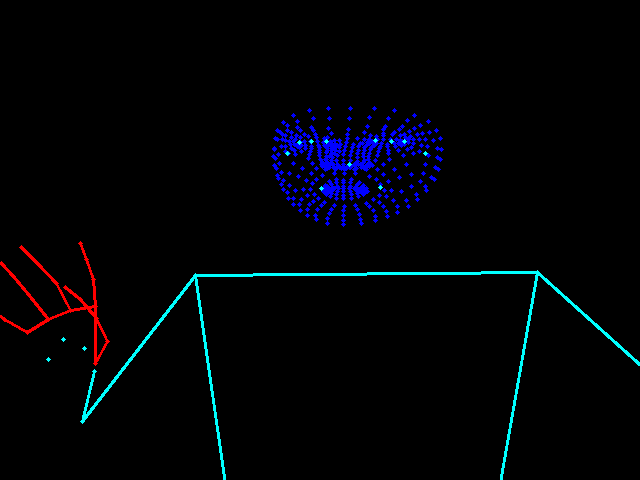

In [ ]:
# Draw landmarks for a specific frame
image = np.zeros((image_height, image_width, 3), dtype=np.uint8)
frame_number = 42
df_frame = df_landmark[df_landmark['frame'] == frame_number]
draw_landmarks(image, df_frame)

# Display the image
cv2_imshow(image)

During our study of the data and research on the possible model solutions, there is one transformer model approach caught our eye. This transformer model approach was designed by Wijkhuizen, M., in the Kaggle competition (2023). Our project team decided to follow Wijkhuizen, M.’s approach to create a transformer model as one of the models to test for this project. Our goal with this approach is to get a better understanding of the transformer model since Wijkhuizen, M.’s approach is to build a transformer model from scratch and not fine-turn a base model.

In [ ]:
# Code From https://www.kaggle.com/code/markwijkhuizen/gislr-tf-data-processing-transformer-training
import pandas as pd
import numpy as np
from tqdm import tqdm
SEED=1234
# Assuming df_metadata is already defined
N = min(1000, len(df_metadata))  # Sample size, adjust as needed
print(N)

# Arrays to store analysis results
N_UNIQUE_FRAMES = np.zeros(N, dtype=np.uint16)
N_MISSING_FRAMES = np.zeros(N, dtype=np.uint16)
MAX_FRAME = np.zeros(N, dtype=np.uint16)

# Sample a subset of the dataset for analysis
sampled_metadata = df_metadata.sample(N, random_state=SEED)

# Loop over the sampled metadata
for idx, (_, row) in enumerate(tqdm(sampled_metadata.iterrows(), total=N)):
    # Load the landmark data
    samplefile_dir = row['path']
    samplefile_full_file_path = os.path.join(main_dir, samplefile_dir)
    df_landmark = pd.read_parquet(samplefile_full_file_path)

    # Analysis of frames
    N_UNIQUE_FRAMES[idx] = df_landmark['frame'].nunique()
    N_MISSING_FRAMES[idx] = (df_landmark['frame'].max() - df_landmark['frame'].min()) - df_landmark['frame'].nunique() + 1
    MAX_FRAME[idx] = df_landmark['frame'].max()

# Printing the first elements for inspection
print(N_UNIQUE_FRAMES[0], N_MISSING_FRAMES[0], MAX_FRAME[0])


1000


100%|██████████| 1000/1000 [14:40<00:00,  1.14it/s]

109 0 148


,N_UNIQUE_FRAMES
count,1000.000000
mean,36.253000
std,42.776054
min,4.000000
1%,6.000000
5%,6.000000
25%,11.000000
50%,22.000000
75%,42.000000
95%,123.000000


NameError: ignored

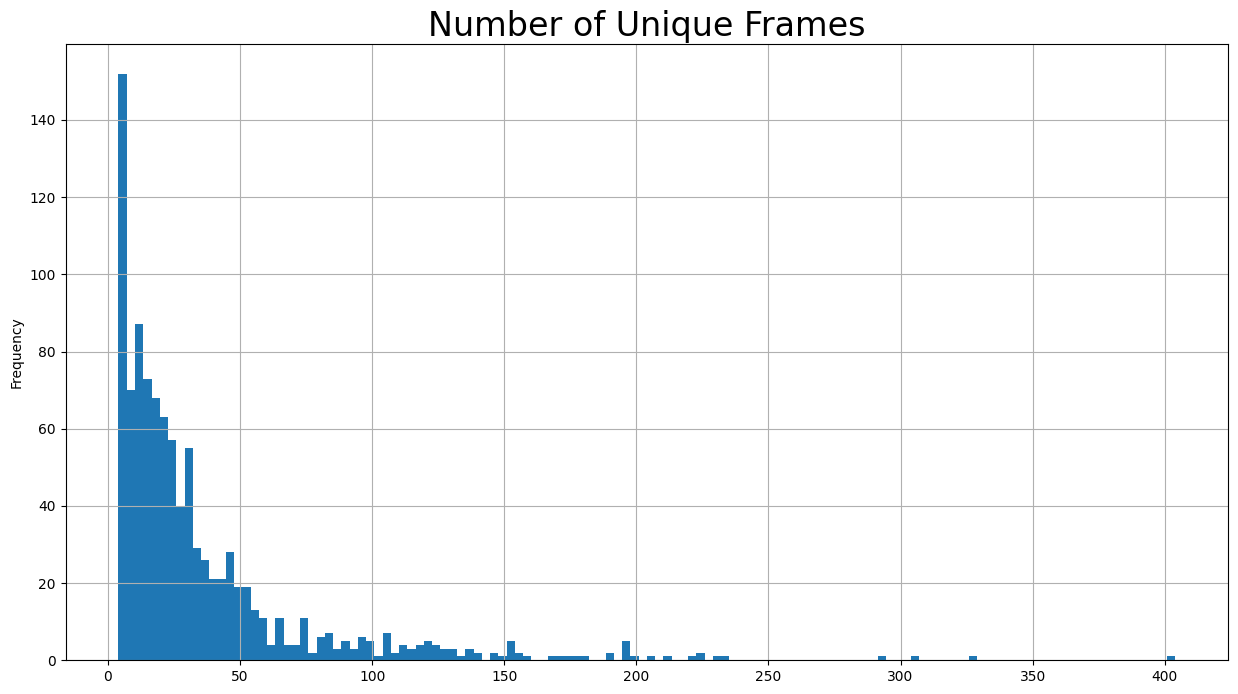

In [ ]:
# Code From https://www.kaggle.com/code/markwijkhuizen/gislr-tf-data-processing-transformer-training
import matplotlib.pyplot as plt
PERCENTILES = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 0.999]
# Number of unique frames in each video
display(pd.Series(N_UNIQUE_FRAMES).describe(percentiles=PERCENTILES).to_frame('N_UNIQUE_FRAMES'))

plt.figure(figsize=(15,8))
plt.title('Number of Unique Frames', size=24)
pd.Series(N_UNIQUE_FRAMES).plot(kind='hist', bins=128)
plt.grid()
xlim = math.ceil(plt.xlim()[1])
plt.xlim(0, xlim)
plt.xticks(np.arange(0, xlim+25, 25))
plt.show()

,N_MISSING_FRAMES
count,1000.0
mean,0.0
std,0.0
min,0.0
1%,0.0
5%,0.0
25%,0.0
50%,0.0
75%,0.0
95%,0.0


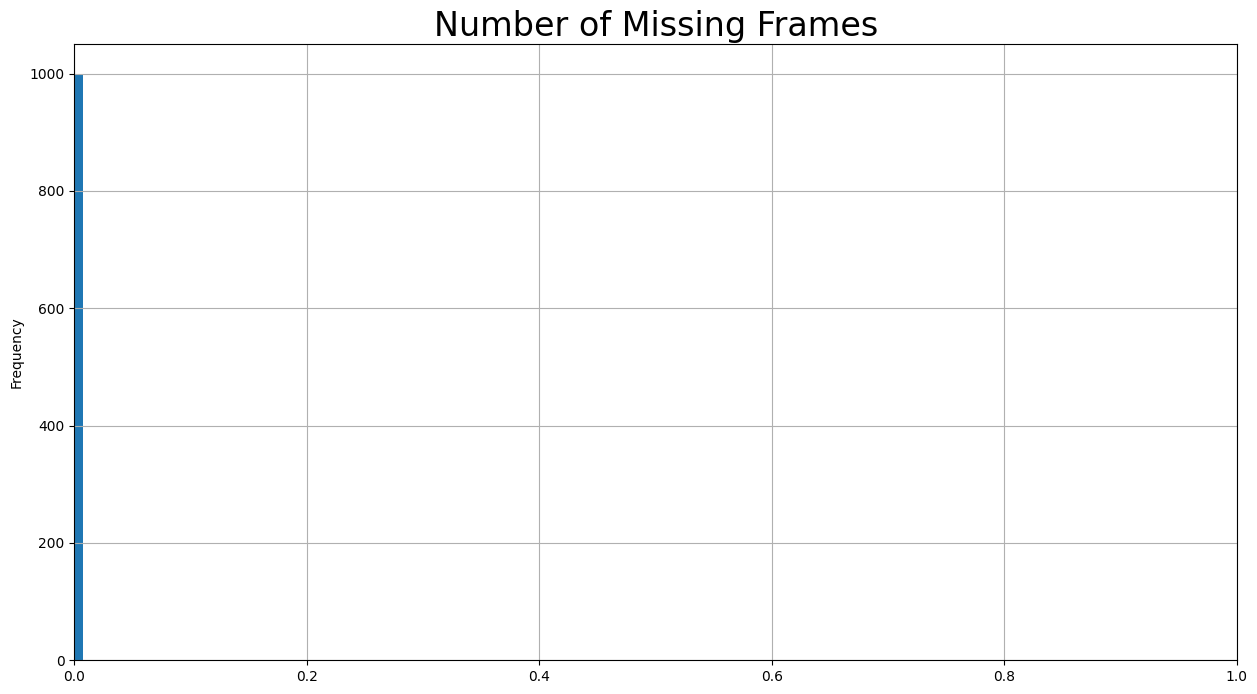

In [ ]:
# Code From https://www.kaggle.com/code/markwijkhuizen/gislr-tf-data-processing-transformer-training
import math
# Number of missing frames, consecutive frames with missing intermediate frame, i.e. 1,2,4,5 -> 3 is missing
display(pd.Series(N_MISSING_FRAMES).describe(percentiles=PERCENTILES).to_frame('N_MISSING_FRAMES'))

plt.figure(figsize=(15,8))
plt.title('Number of Missing Frames', size=24)
pd.Series(N_MISSING_FRAMES).plot(kind='hist', bins=128)
plt.grid()
plt.xlim(0, math.ceil(plt.xlim()[1]))
plt.show()

,MAX_FRAME
count,1000.000000
mean,65.221000
std,57.220559
min,6.000000
1%,15.000000
5%,22.000000
25%,33.000000
50%,42.000000
75%,60.000000
95%,196.000000


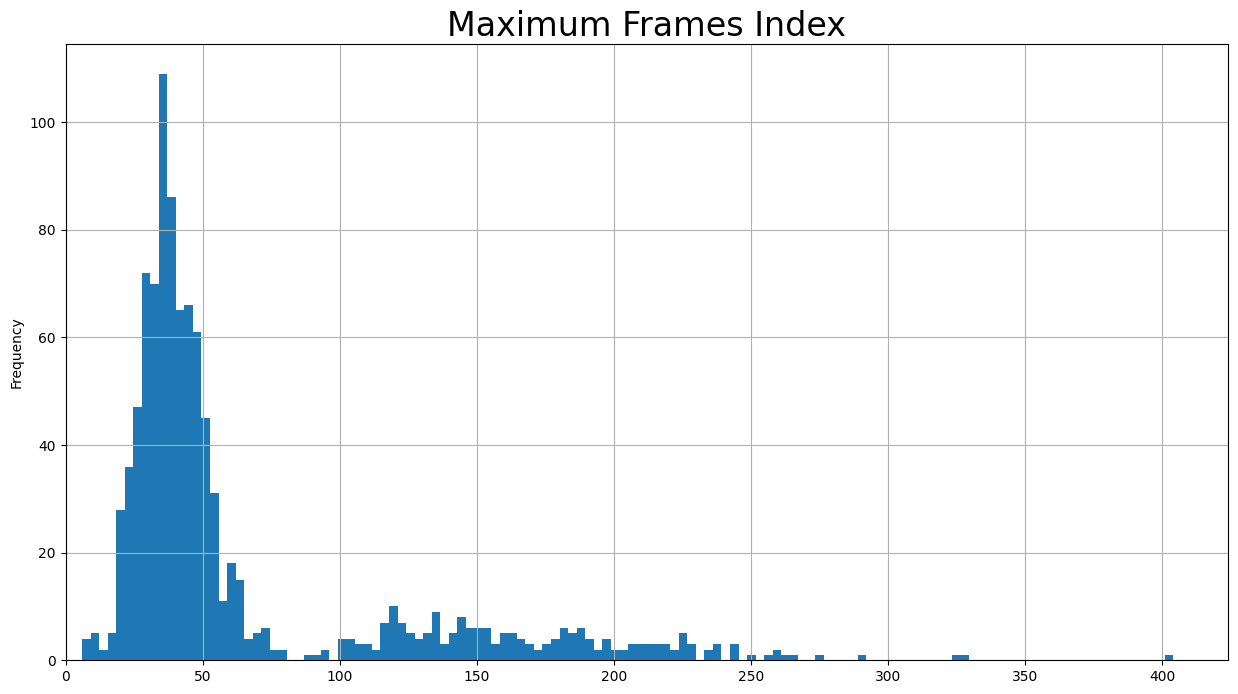

In [ ]:
# Code From https://www.kaggle.com/code/markwijkhuizen/gislr-tf-data-processing-transformer-training
# Maximum frame number
display(pd.Series(MAX_FRAME).describe(percentiles=PERCENTILES).to_frame('MAX_FRAME'))

plt.figure(figsize=(15,8))
plt.title('Maximum Frames Index', size=24)
pd.Series(MAX_FRAME).plot(kind='hist', bins=128)
plt.grid()
plt.xlim(0, math.ceil(plt.xlim()[1]))
plt.show()

Reference:

Wijkhuizen, M. (2023, April 04). GISLR TF Data Processing & Transformer Training. Kaggle. https://www.kaggle.com/code/markwijkhuizen/gislr-tf-data-processing-transformer-training